# Feature Selection And Engineering

Here, we will clean our data, engineer and select our features to build our model.

In [1]:
#First we import our libraries
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pickle
import keras
import tensorflow as tf

In [2]:
#Reading in dataset from EDA
salaries_data=pd.read_csv(r'C:\Users\JESSICA\Environments\dev_salaries\data\final_data.csv')
salaries_data.head()

Unnamed: 0                                         Employment  \
0           4  Independent contractor, freelancer, or self-em...   
1           8                                 Employed part-time   
2          10                                 Employed full-time   
3          11                                 Employed full-time   
4          12                                 Employed full-time   

                                             Country US_State UK_Country  \
0  United Kingdom of Great Britain and Northern I...      NaN    England   
1                                              India      NaN        NaN   
2  United Kingdom of Great Britain and Northern I...      NaN    England   
3                                              Spain      NaN        NaN   
4                                            Germany      NaN        NaN   

                                           EdLevel  YearsCode  YearsCodePro  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       17.0          10.0   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)        6.0           4.0   
2     Bachelor’s degree (B.A., B.S., B.Eng., etc.)       16.0          10.0   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)       12.0           5.0   
4  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       15.0           6.0   

                                             DevType  \
0  Developer, desktop or enterprise applications;...   
1                               Developer, front-end   
2                                Developer, back-end   
3                                Developer, back-end   
4  Developer, desktop or enterprise applications;...   

                                             OrgSize  \
0  Just me - I am a freelancer, sole proprietor, ...   
1                           10,000 or more employees   
2                           10,000 or more employees   
3                                 10 to 19 employees   
4                           1,000 to 4,999 employees   

                              LanguageHaveWorkedWith  \
0                     Bash/Shell;HTML/CSS;Python;SQL   
1                                HTML/CSS;JavaScript   
2                                      C#;TypeScript   
3  Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...   
4                               C;C++;Java;Perl;Ruby   

           DatabaseHaveWorkedWith PlatformHaveWorkedWith  \
0  Elasticsearch;PostgreSQL;Redis                    NaN   
1                      PostgreSQL                    AWS   
2     Microsoft SQL Server;Oracle        Microsoft Azure   
3                      PostgreSQL                    AWS   
4                             NaN                    NaN   

    WebframeHaveWorkedWith            MiscTechHaveWorkedWith  \
0                    Flask  Apache Spark;Hadoop;NumPy;Pandas   
1           Django;FastAPI                               NaN   
2    Angular;ASP.NET Core                 .NET Core / .NET 5   
3  Express;React.js;Vue.js                               NaN   
4            Ruby on Rails                                Qt   

      ToolsTechHaveWorkedWith                NEWCollabToolsHaveWorkedWith  \
0  Docker;Git;Kubernetes;Yarn  Atom;IPython/Jupyter;Notepad++;PyCharm;Vim   
1                  Docker;Git                        PyCharm;Sublime Text   
2                         Git                     Notepad++;Visual Studio   
3                         Git                                        Atom   
4                         Git                                         Vim   

               Age Gender                                          Ethnicity  \
0  25-34 years old    Man                       White or of European descent   
1  25-34 years old    Man                                        South Asian   
2  25-34 years old    Man                       White or of European descent   
3  25-34 years old    Man  White or of European descent;Hispanic or Latin...   
4  25-34 years old    Man                 

In [3]:
#shape of dataframe
salaries_data.shape

(37539, 21)

In [4]:
salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37539 entries, 0 to 37538
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    37539 non-null  int64  
 1   Employment                    37513 non-null  object 
 2   Country                       37539 non-null  object 
 3   US_State                      10874 non-null  object 
 4   UK_Country                    3213 non-null   object 
 5   EdLevel                       37475 non-null  object 
 6   YearsCode                     37027 non-null  float64
 7   YearsCodePro                  35278 non-null  float64
 8   DevType                       36033 non-null  object 
 9   OrgSize                       35629 non-null  object 
 10  LanguageHaveWorkedWith        37376 non-null  object 
 11  DatabaseHaveWorkedWith        33045 non-null  object 
 12  PlatformHaveWorkedWith        26117 non-null  object 
 13  W

Our dependent variable is `ConvertedCompYearly`. We can see that close to 10000 rows are missing for this column. We will have to find a technique to fill in missing data

In [5]:
salaries_data.describe()

Unnamed: 0     YearsCode  YearsCodePro  ConvertedCompYearly
count  37539.000000  37027.000000  35278.000000         2.799000e+04
mean   40663.211753     14.768196      9.606355         1.436751e+05
std    24074.361623      9.926421      8.480921         5.441638e+05
min        4.000000      0.000000      0.000000         1.000000e+00
25%    19358.000000      7.000000      3.000000         3.632400e+04
50%    40821.000000     12.000000      7.000000         6.869950e+04
75%    60657.000000     20.000000     13.000000         1.200000e+05
max    83438.000000     50.000000     50.000000         2.182225e+07

In [6]:
#Dropping 'Unnamed' column
salaries_data=salaries_data.drop(columns=['Unnamed: 0'])

### Data Cleaning 

In [7]:
#Taking out under represented entries in the employment feature
salaries_data.drop(salaries_data[(salaries_data['Employment'].isna()) | (salaries_data['Employment'] == 'I prefer not to say') | (salaries_data['Employment'] == 'Student, part-time' )| (salaries_data['Employment'] == 'Not employed, and not looking for work') | (salaries_data['Employment'] == 'Retired')].index, inplace=True)
                        



In [8]:
#Renaming entries in the EdLevel Feature, because everyone has df_po form of education, NaNs couls also fall under 'df_pothing else'
salaries_data=salaries_data.replace({'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral Degree',  'Associate degree (A.A., A.S., etc.)': 'Other Degree(Associate or Professional)', 'Professional degree (JD, MD, etc.)': 'Other Degree(Associate or Professional)', 'Primary/elementary school':'Something else'} )

In [9]:
salaries_data=salaries_data.reset_index()
#Drop index column
salaries_data=salaries_data.drop(columns='index')

In [10]:
#Fill Null values with 'something else'
salaries_data['EdLevel']=salaries_data['EdLevel'].fillna('Something else')

In [11]:
salaries_data[salaries_data['YearsCode'].isna() & salaries_data['YearsCodePro'].notna()]

Employment  \
62                                    Employed full-time   
387                                   Employed full-time   
457                                   Employed full-time   
565                                   Employed full-time   
796                                   Employed full-time   
951                                   Employed full-time   
1219                                  Employed full-time   
1271                                  Employed full-time   
2498                                  Employed full-time   
2596                                  Employed full-time   
2805                                  Employed full-time   
2930                                  Employed full-time   
3077                                  Employed full-time   
3102                                  Employed full-time   
3749                                  Employed full-time   
3848                                  Employed full-time   
4084   Independent contractor, freelancer, or self-em...   
4086                                  Employed full-time   
4931                                  Employed full-time   
5078                                  Employed full-time   
5448                                  Employed full-time   
5960                                  Employed full-time   
6459   Independent contractor, freelancer, or self-em...   
6471                                  Employed full-time   
6513                                  Employed full-time   
6759                                  Employed full-time   
7036                                  Employed full-time   
7149   Independent contractor, freelancer, or self-em...   
7224   Independent contractor, freelancer, or self-em...   
7354                                  Employed full-time   
7611                                  Employed full-time   
7672                                  Employed full-time   
8417                                  Employed full-time   
8446                                  Employed full-time   
8737                                  Employed full-time   
9016                                  Employed full-time   
9389                                  Employed full-time   
9447                                  Employed full-time   
9484                                  Employed part-time   
10310                                 Employed full-time   
10744                                 Employed full-time   
10836                                 Employed full-time   
11498                                 Employed full-time   
12401  Independent contractor, freelancer, or self-em...   
12469                                 Employed full-time   
14788                                 Employed full-time   
15397                                 Employed full-time   
16251                                 Employed full-time   
16758                                 Employed full-time   
17566  Independent contractor, freelancer, or self-em...   
17747  Independent contractor, freelancer, or self-em...   
18938                                 Employed full-time   
19083                                 Employed full-time   
19311                                 Employed full-time   
19443                                 Employed full-time   
19628                                 Employed full-time   
20504                                 Employed full-time   
21116                                 Employed full-time   
21537                                 Employed full-time   
24282                                 Employed full-time   
25121                                 Employed full-time   
25344                                 Employed full-time   
25755                                 Employed full-time   
26972                                 Employed full-time   
29003                                 Employed full-time   
29501                                 Employed full-time   
30662                     

There are instances that contain `yearscodepro` but do not contain `yearscode`. We can fill those `NaNs` with values from `yearscodepro` because from our EDA, they have a high positive correlation and will act similar in model building. 

In [12]:
#Filling NANs in 'YearsCode
salaries_data['YearsCode'].fillna(salaries_data['YearsCodePro'], inplace=True)

In [13]:
len(salaries_data[salaries_data['YearsCode'].isna()])

404

We still have some Null values to take care of.

In [14]:
#Checking and dropping instances where yearscode and yearlycompensation are missing
salaries_data.drop(salaries_data[salaries_data['YearsCode'].isna() & salaries_data['ConvertedCompYearly'].isna()].index, inplace=True)


In [15]:
salaries_data=salaries_data.reset_index()
salaries_data=salaries_data.drop(columns='index')

In [16]:
#Filling remaining Null values with median yearsofcode
salaries_data['YearsCode'].fillna(salaries_data['YearsCode'].median(), inplace=True)

In [17]:
#Checking for number of missing values in 'DevType' column
len(salaries_data[salaries_data['DevType'].isna()])

892

From our EDA, we realized that `DevType` has an entry called 'Others(specify):' that we need to take care of 

In [18]:
len(salaries_data[salaries_data['DevType']=='Other (please specify):'])

313

Some instances of `DevType` have multiple entries so we will pick the inputs of the entries. 

In [19]:
#Splitting about ';' and picking first input
salaries_data['DevType']=salaries_data['DevType'].str.split(';').str[0]
salaries_data.head()

Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Employed part-time   
2                                 Employed full-time   
3                                 Employed full-time   
4                                 Employed full-time   

                                             Country US_State UK_Country  \
0  United Kingdom of Great Britain and Northern I...      NaN    England   
1                                              India      NaN        NaN   
2  United Kingdom of Great Britain and Northern I...      NaN    England   
3                                              Spain      NaN        NaN   
4                                            Germany      NaN        NaN   

                                           EdLevel  YearsCode  YearsCodePro  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       17.0          10.0   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)        6.0           4.0   
2     Bachelor’s degree (B.A., B.S., B.Eng., etc.)       16.0          10.0   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)       12.0           5.0   
4  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       15.0           6.0   

                                         DevType  \
0  Developer, desktop or enterprise applications   
1                           Developer, front-end   
2                            Developer, back-end   
3                            Developer, back-end   
4  Developer, desktop or enterprise applications   

                                             OrgSize  \
0  Just me - I am a freelancer, sole proprietor, ...   
1                           10,000 or more employees   
2                           10,000 or more employees   
3                                 10 to 19 employees   
4                           1,000 to 4,999 employees   

                              LanguageHaveWorkedWith  \
0                     Bash/Shell;HTML/CSS;Python;SQL   
1                                HTML/CSS;JavaScript   
2                                      C#;TypeScript   
3  Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...   
4                               C;C++;Java;Perl;Ruby   

           DatabaseHaveWorkedWith PlatformHaveWorkedWith  \
0  Elasticsearch;PostgreSQL;Redis                    NaN   
1                      PostgreSQL                    AWS   
2     Microsoft SQL Server;Oracle        Microsoft Azure   
3                      PostgreSQL                    AWS   
4                             NaN                    NaN   

    WebframeHaveWorkedWith            MiscTechHaveWorkedWith  \
0                    Flask  Apache Spark;Hadoop;NumPy;Pandas   
1           Django;FastAPI                               NaN   
2    Angular;ASP.NET Core                 .NET Core / .NET 5   
3  Express;React.js;Vue.js                               NaN   
4            Ruby on Rails                                Qt   

      ToolsTechHaveWorkedWith                NEWCollabToolsHaveWorkedWith  \
0  Docker;Git;Kubernetes;Yarn  Atom;IPython/Jupyter;Notepad++;PyCharm;Vim   
1                  Docker;Git                        PyCharm;Sublime Text   
2                         Git                     Notepad++;Visual Studio   
3                         Git                                        Atom   
4                         Git                                         Vim   

               Age Gender                                          Ethnicity  \
0  25-34 years old    Man                       White or of European descent   
1  25-34 years old    Man                                        South Asian   
2  25-34 years old    Man                       White or of European descent   
3  25-34 years old    Man  White or of European descent;Hispanic or Latin...   
4  25-34 years old    Man                       White or of European descent   

   ConvertedCompYearly  
0                  NaN  
1                  NaN  
2                  Na

In [20]:
#Replacing 'Other (please specify):' with Nan
salaries_data['DevType']=salaries_data['DevType'].replace({'Other (please specify):':np.nan})

In [21]:
#First, we will drop null values in the 'LanguageHaveWorkedWith' column 
salaries_data=salaries_data.drop(salaries_data[salaries_data['LanguageHaveWorkedWith'].isna()].index).reset_index()
salaries_data=salaries_data.drop(columns='index')
salaries_data[salaries_data['LanguageHaveWorkedWith'].isna()]

Empty DataFrame
Columns: [Employment, Country, US_State, UK_Country, EdLevel, YearsCode, YearsCodePro, DevType, OrgSize, LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, MiscTechHaveWorkedWith, ToolsTechHaveWorkedWith, NEWCollabToolsHaveWorkedWith, Age, Gender, Ethnicity, ConvertedCompYearly]
Index: []

In [22]:
#Creating columns for various programming languages 
salaries_data['LanguageHaveWorkedWith']=salaries_data['LanguageHaveWorkedWith'].str.split(';')
salaries_data['C']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'C' in x else 0)
salaries_data['C++']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'C++' in x else 0)
salaries_data['C#']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'C#' in x else 0)
salaries_data['Dart']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'Dart' in x else 0)
salaries_data['Go']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'Go' in x else 0)
salaries_data['Bash/Shell']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'Bash/Shell' in x else 0)
salaries_data['HTML/CSS']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'HTML/CSS' in x else 0)
salaries_data['Java']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'Java' in x else 0)
salaries_data['JavaScript']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'JavaScript' in x else 0)
salaries_data['Node.js']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'Node.js' in x else 0)
salaries_data['TypeScript']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'TypeScript' in x else 0)
salaries_data['Python']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'Python' in x else 0)
salaries_data['Kotlin']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'Kotlin' in x else 0)
salaries_data['R']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'R' in x else 0)
salaries_data['SQL']=salaries_data['LanguageHaveWorkedWith'].apply(lambda x: 1 if 'SQL' in x else 0)

For the `Age` column we will fill Null values with 'Prefer not to say'

In [23]:
salaries_data['Age'].unique()

array(['25-34 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', 'Under 18 years old', '55-64 years old', nan,
       'Prefer not to say', '65 years or older'], dtype=object)

In [24]:
#Filling null values with 'Prefer not to say'
salaries_data['Age']=salaries_data['Age'].fillna('Prefer not to say')

Cleaning Gender Column

In [25]:
salaries_data['Gender'].value_counts()

Man                                                                                   33187
Woman                                                                                  1695
Prefer not to say                                                                       525
Non-binary, genderqueer, or gender non-conforming                                       316
Or, in your own words:                                                                  143
Man;Non-binary, genderqueer, or gender non-conforming                                   116
Man;Or, in your own words:                                                               86
Woman;Non-binary, genderqueer, or gender non-conforming                                  75
Man;Woman                                                                                11
Man;Woman;Non-binary, genderqueer, or gender non-conforming                               7
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:        

Like we saw from our EDA, other gender forms asides men were greatly underrepresented, we will join all other gender forms asides man and woman into one gender form and replace nans with 'Prefer not to state my gender'

In [26]:
salaries_data['Gender']=salaries_data['Gender'].replace({'Prefer not to say': 'Prefer not to state my gender'})
salaries_data['Gender']=salaries_data['Gender'].fillna('Prefer not to state my gender')

In [27]:
#Combining other gender forms 
alist=['Man', 'Woman', 'Prefer not to state my gender']
for i in salaries_data['Gender'].unique():
    if i not in alist:
        salaries_data['Gender']=salaries_data['Gender'].replace({i:'Other gender forms'})

In [28]:
#Checking new options
salaries_data['Gender'].unique()

array(['Man', 'Woman', 'Other gender forms',
       'Prefer not to state my gender'], dtype=object)

Cleaning `OrgSize` column

In [29]:
salaries_data['OrgSize'].unique()

array(['Just me - I am a freelancer, sole proprietor, etc.',
       '10,000 or more employees', '10 to 19 employees',
       '1,000 to 4,999 employees', '500 to 999 employees',
       '5,000 to 9,999 employees', '2 to 9 employees', nan,
       '20 to 99 employees', '100 to 499 employees', 'I don’t know'],
      dtype=object)

In [30]:
#Replace np.nan with 'I don't know'
salaries_data['OrgSize']=salaries_data['OrgSize'].fillna('I don’t know')
salaries_data[salaries_data['OrgSize'].isna()]


Empty DataFrame
Columns: [Employment, Country, US_State, UK_Country, EdLevel, YearsCode, YearsCodePro, DevType, OrgSize, LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, MiscTechHaveWorkedWith, ToolsTechHaveWorkedWith, NEWCollabToolsHaveWorkedWith, Age, Gender, Ethnicity, ConvertedCompYearly, C, C++, C#, Dart, Go, Bash/Shell, HTML/CSS, Java, JavaScript, Node.js, TypeScript, Python, Kotlin, R, SQL]
Index: []

In [31]:
salaries_data.head()

Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Employed part-time   
2                                 Employed full-time   
3                                 Employed full-time   
4                                 Employed full-time   

                                             Country US_State UK_Country  \
0  United Kingdom of Great Britain and Northern I...      NaN    England   
1                                              India      NaN        NaN   
2  United Kingdom of Great Britain and Northern I...      NaN    England   
3                                              Spain      NaN        NaN   
4                                            Germany      NaN        NaN   

                                           EdLevel  YearsCode  YearsCodePro  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       17.0          10.0   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)        6.0           4.0   
2     Bachelor’s degree (B.A., B.S., B.Eng., etc.)       16.0          10.0   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)       12.0           5.0   
4  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       15.0           6.0   

                                         DevType  \
0  Developer, desktop or enterprise applications   
1                           Developer, front-end   
2                            Developer, back-end   
3                            Developer, back-end   
4  Developer, desktop or enterprise applications   

                                             OrgSize  \
0  Just me - I am a freelancer, sole proprietor, ...   
1                           10,000 or more employees   
2                           10,000 or more employees   
3                                 10 to 19 employees   
4                           1,000 to 4,999 employees   

                              LanguageHaveWorkedWith  \
0                [Bash/Shell, HTML/CSS, Python, SQL]   
1                             [HTML/CSS, JavaScript]   
2                                   [C#, TypeScript]   
3  [Bash/Shell, HTML/CSS, JavaScript, Node.js, SQ...   
4                         [C, C++, Java, Perl, Ruby]   

           DatabaseHaveWorkedWith PlatformHaveWorkedWith  \
0  Elasticsearch;PostgreSQL;Redis                    NaN   
1                      PostgreSQL                    AWS   
2     Microsoft SQL Server;Oracle        Microsoft Azure   
3                      PostgreSQL                    AWS   
4                             NaN                    NaN   

    WebframeHaveWorkedWith            MiscTechHaveWorkedWith  \
0                    Flask  Apache Spark;Hadoop;NumPy;Pandas   
1           Django;FastAPI                               NaN   
2    Angular;ASP.NET Core                 .NET Core / .NET 5   
3  Express;React.js;Vue.js                               NaN   
4            Ruby on Rails                                Qt   

      ToolsTechHaveWorkedWith                NEWCollabToolsHaveWorkedWith  \
0  Docker;Git;Kubernetes;Yarn  Atom;IPython/Jupyter;Notepad++;PyCharm;Vim   
1                  Docker;Git                        PyCharm;Sublime Text   
2                         Git                     Notepad++;Visual Studio   
3                         Git                                        Atom   
4                         Git                                         Vim   

               Age Gender                                          Ethnicity  \
0  25-34 years old    Man                       White or of European descent   
1  25-34 years old    Man                                        South Asian   
2  25-34 years old    Man                       White or of European descent   
3  25-34 years old    Man  White or of European descent;Hispanic or Latin...   
4  25-34 years old    Man                       White or of European descent   

   ConvertedCompYearly  C  C++  C#  Dart  Go  Bash/Shell  HTML/CSS  Java  \
0                  N

In [32]:
salaries_data['DatabaseHaveWorkedWith'].value_counts()

Microsoft SQL Server                                                                                                                     2147
PostgreSQL                                                                                                                               1877
MySQL                                                                                                                                    1524
SQLite                                                                                                                                    806
PostgreSQL;Redis                                                                                                                          635
MongoDB                                                                                                                                   615
PostgreSQL;SQLite                                                                                                                         562
MySQL;

In [33]:
#Dealing with Null values
salaries_data['DatabaseHaveWorkedWith']=salaries_data['DatabaseHaveWorkedWith'].fillna('I dont use databases;')
salaries_data=salaries_data.replace({'Microsoft SQL Server': 'Microsoft SQL Server;', 'MySQL': 'MySQL;', 'PostgreSQL':'PostgreSQL;', 'SQLite':'SQLite;', 'MongoDB':'MongoDB;', 'MariaDB': 'MariaDB;', 'Firebase':'Firebase;', 'Oracle':'Oracle;', 'DynamoDB':'DynamoDB;' })

In [34]:
#Creating columns for 'DatabaseHaveWorkedWith'
salaries_data['DatabaseHaveWorkedWith']=salaries_data['DatabaseHaveWorkedWith'].str.split(';')
salaries_data['Microsoft SQL Server']=salaries_data['DatabaseHaveWorkedWith'].apply(lambda x: 1 if 'Microsoft SQL Server' in x else 0)
salaries_data['MySQL']=salaries_data['DatabaseHaveWorkedWith'].apply(lambda x: 1 if 'MySQL' in x else 0)
salaries_data['PostgreSQL']=salaries_data['DatabaseHaveWorkedWith'].apply(lambda x: 1 if 'PostgreSQL' in x else 0)
salaries_data['Redis']=salaries_data['DatabaseHaveWorkedWith'].apply(lambda x: 1 if 'Redis' in x else 0)
salaries_data['MongoDB']=salaries_data['DatabaseHaveWorkedWith'].apply(lambda x: 1 if 'MongoDB' in x else 0)
salaries_data['SQLite']=salaries_data['DatabaseHaveWorkedWith'].apply(lambda x: 1 if 'SQLite' in x else 0)
salaries_data['MariaDB']=salaries_data['DatabaseHaveWorkedWith'].apply(lambda x: 1 if 'MariaDB' in x else 0)
salaries_data['Firebase']=salaries_data['DatabaseHaveWorkedWith'].apply(lambda x: 1 if 'Firebase' in x else 0)
salaries_data['Oracle']=salaries_data['DatabaseHaveWorkedWith'].apply(lambda x: 1 if 'Oracle' in x else 0)
salaries_data['DynamoDB']=salaries_data['DatabaseHaveWorkedWith'].apply(lambda x: 1 if 'DynamoDB' in x else 0)
salaries_data['I dont use databases']=salaries_data['DatabaseHaveWorkedWith'].apply(lambda x: 1 if 'I dont use databases' in x else 0)


For the `PlatformHaveWorkedWith` column as we said in the EDA phase, we will only consider AWS, GCP and Azure. 

In [35]:
#Fill null values with 'I dont use cloud platforms'
salaries_data['PlatformHaveWorkedWith']=salaries_data['PlatformHaveWorkedWith'].fillna('I dont use any cloud platforms;')

In [36]:
salaries_data=salaries_data.replace({'AWS':'AWS;', 'Google Cloud Platform': 'Google Cloud Platform;', 'Microsoft Azure': 'Microsoft Azure;'})

In [37]:
#Split on ';'
salaries_data['PlatformHaveWorkedWith']=salaries_data['PlatformHaveWorkedWith'].str.split(';')
salaries_data['PlatformHaveWorkedWith']

0                       [I dont use any cloud platforms, ]
1                                                  [AWS, ]
2                                      [Microsoft Azure, ]
3                                                  [AWS, ]
4                       [I dont use any cloud platforms, ]
5                                                  [AWS, ]
6                       [I dont use any cloud platforms, ]
7                                            [AWS, Heroku]
8                       [I dont use any cloud platforms, ]
9            [AWS, Google Cloud Platform, Microsoft Azure]
10                      [I dont use any cloud platforms, ]
11                      [I dont use any cloud platforms, ]
12                      [I dont use any cloud platforms, ]
13                      [I dont use any cloud platforms, ]
14           [AWS, Google Cloud Platform, Microsoft Azure]
15                               [Google Cloud Platform, ]
16                               [Heroku, Microsoft Azur

In [38]:
#Create columns for cloud platforms 
salaries_data['AWS']=salaries_data['PlatformHaveWorkedWith'].apply(lambda x: 1 if 'AWS' in x else 0)
salaries_data['GCP']=salaries_data['PlatformHaveWorkedWith'].apply(lambda x: 1 if 'Google Cloud Platform' in x else 0)
salaries_data['Microsoft Azure']=salaries_data['PlatformHaveWorkedWith'].apply(lambda x: 1 if 'Microsoft Azure' in x else 0)
salaries_data['Other Cloud Platforms']=salaries_data['PlatformHaveWorkedWith'].apply(lambda x: 1 if 'IBM Cloud or Watson' in x else 2 if 'Heroku' in x else 3 if 'DigitalOcean' in x else 4 if 'Oracle Cloud Infrastructure' in x else 0)
salaries_data['I dont use any cloud platforms']=salaries_data['PlatformHaveWorkedWith'].apply(lambda x: 1 if 'I dont use any cloud platforms' in x else 0)


In [39]:
#Replace options in 'Other Cloud Platforms'
salaries_data['Other Cloud Platforms']=salaries_data['Other Cloud Platforms'].replace({2:1, 3:1, 4:1})
salaries_data['Other Cloud Platforms']


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       1
17       0
18       1
19       0
20       0
21       0
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
30       0
31       1
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       1
42       0
43       0
44       1
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       1
53       1
54       0
55       0
56       1
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       1
65       0
66       0
67       0
68       0
69       1
70       0
71       1
72       0
73       0
74       0
75       0
76       0
77       1
78       0
79       0
80       0
81       0
82       1
83       1
84       0
85       0
86       0
87       0
88       0
89       0
90       0

Considering webframeworks worked with, we will consider `React.js`, `Spring`, `ASP.NET` and `ASP.NET Core`, `Django`, `Flask`, `jQuery`

In [40]:
#Filling Null values with 'I don't use any webframeworks'
salaries_data['WebframeHaveWorkedWith']=salaries_data['WebframeHaveWorkedWith'].fillna('I dont use any webframeworks;')

In [41]:
salaries_data['WebframeHaveWorkedWith'].value_counts()

I dont use any webframeworks;                                                                                                                             7288
React.js                                                                                                                                                  1674
Spring                                                                                                                                                     987
Express;React.js                                                                                                                                           846
jQuery                                                                                                                                                     843
Flask                                                                                                                                                      655
Angular                                       

In [42]:
salaries_data=salaries_data.replace({'React.js':'React.js;', 'Spring': 'Spring;', 'jQuery': 'jQuery;', 'Angular':'Angular;', 'Django':'Django;', 'Flask':'Flask;', 'ASP.NET':'ASP.NET;','ASP.NET Core ':'ASP.NET Core;'})

In [43]:
salaries_data['WebframeHaveWorkedWith']=salaries_data['WebframeHaveWorkedWith'].str.split(';')
salaries_data['WebframeHaveWorkedWith']

0                                                [Flask, ]
1                                        [Django, FastAPI]
2                                 [Angular, ASP.NET Core ]
3                              [Express, React.js, Vue.js]
4                                          [Ruby on Rails]
5                         [jQuery, Laravel, Ruby on Rails]
6                         [I dont use any webframeworks, ]
7                               [Angular, Express, Spring]
8                         [I dont use any webframeworks, ]
9                         [I dont use any webframeworks, ]
10                        [I dont use any webframeworks, ]
11                           [Angular.js, jQuery, Laravel]
12                        [I dont use any webframeworks, ]
13                        [I dont use any webframeworks, ]
14                        [I dont use any webframeworks, ]
15                                 [Django, Flask, Vue.js]
16                               [ASP.NET Core , React.j

In [44]:
#Creating columns for web frameworks
salaries_data['React.js']=salaries_data['WebframeHaveWorkedWith'].apply(lambda x: 1 if 'React.js' in x else 0)
salaries_data['Spring']=salaries_data['WebframeHaveWorkedWith'].apply(lambda x: 1 if 'Spring' in x else 0)
salaries_data['Angular']=salaries_data['WebframeHaveWorkedWith'].apply(lambda x: 1 if 'Angular' in x else 0)
salaries_data['ASP.NET or ASP.NET Core']=salaries_data['WebframeHaveWorkedWith'].apply(lambda x: 1 if 'ASP.NET' in x else 2 if 'ASP.NET Core' in x  else 0)
salaries_data['Django']=salaries_data['WebframeHaveWorkedWith'].apply(lambda x: 1 if 'Django' in x else 0)
salaries_data['Flask']=salaries_data['WebframeHaveWorkedWith'].apply(lambda x: 1 if 'Flask' in x else 0)
salaries_data['jQuery']=salaries_data['WebframeHaveWorkedWith'].apply(lambda x: 1 if 'jQuery' in x else 0)
salaries_data['I dont use any webframeworks']=salaries_data['WebframeHaveWorkedWith'].apply(lambda x: 1 if 'I dont use any webframeworks' in x else 0)
salaries_data['Other webframeworks']=salaries_data['WebframeHaveWorkedWith'].apply(lambda x: 1 if 'Express' in x else 2 if 'Vue.js' in x  else 3 if 'Express' in x else 4 if 'Laravel' in x else 0)


In [45]:
salaries_data['ASP.NET or ASP.NET Core']=salaries_data['ASP.NET or ASP.NET Core'].replace({2:1})
salaries_data['Other webframeworks']=salaries_data['Other webframeworks'].replace({2:1, 3:1, 4:1})

In [46]:
salaries_data['MiscTechHaveWorkedWith'].value_counts()

.NET Framework;.NET Core / .NET 5                                                                                                    3995
.NET Framework                                                                                                                       1523
React Native                                                                                                                         1430
.NET Core / .NET 5                                                                                                                   1287
NumPy;Pandas                                                                                                                         1242
Flutter                                                                                                                               933
Cordova                                                                                                                               642
Qt                                

In [47]:
#Filling null values in 'MiscTechHaveWorkedWith'
salaries_data['MiscTechHaveWorkedWith']=salaries_data['MiscTechHaveWorkedWith'].fillna('No other frameworks used;')

In [48]:
salaries_data=salaries_data.replace({'NumPy':'NumPy;', 'Pandas': 'Pandas;', 'TensorFlow': 'Tensorflow;', 'Apache Spark':'Apache Spark;', 'Hadoop':'Hadoop;', 'Keras':'Keras;', '.NET Framework':'.NET Framework;','.NET Core / .NET 5':'.NET Core/.NET 5;', 'Flutter':'Flutter;', 'React Native':'React Native;', 'Torch/PyTorch':'Torch/PyTorch;'})

In [49]:
salaries_data['MiscTechHaveWorkedWith']=salaries_data['MiscTechHaveWorkedWith'].str.split(';')
salaries_data['NumPy']=salaries_data['MiscTechHaveWorkedWith'].apply(lambda x: 1 if 'NumPy' in x else 0)
salaries_data['Pandas']=salaries_data['MiscTechHaveWorkedWith'].apply(lambda x: 1 if 'Pandas' in x else 0)
salaries_data['Keras/Tensorflow']=salaries_data['MiscTechHaveWorkedWith'].apply(lambda x: 1 if 'Keras' in x else 2 if 'Tensorflow' in x else 0)
salaries_data['Apache Spark']=salaries_data['MiscTechHaveWorkedWith'].apply(lambda x: 1 if 'Apache Spark' in x   else 0)
salaries_data['Hadoop']=salaries_data['MiscTechHaveWorkedWith'].apply(lambda x: 1 if 'Hadoop' in x else 0)
salaries_data['.NET Framework']=salaries_data['MiscTechHaveWorkedWith'].apply(lambda x: 1 if '.NET Framework' in x else 0)
salaries_data['.NET Core/.NET 5']=salaries_data['MiscTechHaveWorkedWith'].apply(lambda x: 1 if '.NET Core/.NET 5' in x else 0)
salaries_data['Flutter']=salaries_data['MiscTechHaveWorkedWith'].apply(lambda x: 1 if 'Flutter' in x else 0)
salaries_data['React Native']=salaries_data['MiscTechHaveWorkedWith'].apply(lambda x: 1 if 'React Native' in x else 0)
salaries_data['Torch/PyTorch']=salaries_data['MiscTechHaveWorkedWith'].apply(lambda x: 1 if 'Torch/PyTorch' in x else 0)
salaries_data['No other frameworks used']=salaries_data['MiscTechHaveWorkedWith'].apply(lambda x: 1 if 'No other frameworks used' in x else 0)


In [50]:
#Fix options for Tensorflow/Keras
salaries_data['Keras/Tensorflow']=salaries_data['Keras/Tensorflow'].replace({2:1})

For the `ToolsTechHaveWorkedWith`, we will consider Git, Docker, Kubernetes and Terraform

In [51]:
#Filling null values in 'ToolsTechHaveWorkedWith'
salaries_data['ToolsTechHaveWorkedWith']=salaries_data['ToolsTechHaveWorkedWith'].fillna('No extra tools used;')
salaries_data=salaries_data.replace({'Git':'Git;', 'Docker': 'Docker;', 'Kubernetes': 'Kubernetes;', 'Terraform':'Terraform;'})
salaries_data['ToolsTechHaveWorkedWith']=salaries_data['ToolsTechHaveWorkedWith'].str.split(';')
salaries_data['Git']=salaries_data['ToolsTechHaveWorkedWith'].apply(lambda x: 1 if 'Git' in x else 0)
salaries_data['Docker']=salaries_data['ToolsTechHaveWorkedWith'].apply(lambda x: 1 if 'Docker' in x else 0)
salaries_data['Kubernetes']=salaries_data['ToolsTechHaveWorkedWith'].apply(lambda x: 1 if 'Kubernetes' in x  else 0)
salaries_data['Terraform']=salaries_data['ToolsTechHaveWorkedWith'].apply(lambda x: 1 if 'Terraform' in x   else 0)
salaries_data['No extra tools used']=salaries_data['ToolsTechHaveWorkedWith'].apply(lambda x: 1 if 'No extra tools used' in x   else 0)

In [52]:
salaries_data['DevType']=salaries_data['DevType'].fillna('Not entirely sure of my devtype')

We will now drop columns we engineered new features from 


In [53]:
salaries_data.columns

Index(['Employment', 'Country', 'US_State', 'UK_Country', 'EdLevel',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith', 'Age', 'Gender', 'Ethnicity',
       'ConvertedCompYearly', 'C', 'C++', 'C#', 'Dart', 'Go', 'Bash/Shell',
       'HTML/CSS', 'Java', 'JavaScript', 'Node.js', 'TypeScript', 'Python',
       'Kotlin', 'R', 'SQL', 'Microsoft SQL Server', 'MySQL', 'PostgreSQL',
       'Redis', 'MongoDB', 'SQLite', 'MariaDB', 'Firebase', 'Oracle',
       'DynamoDB', 'I dont use databases', 'AWS', 'GCP', 'Microsoft Azure',
       'Other Cloud Platforms', 'I dont use any cloud platforms', 'React.js',
       'Spring', 'Angular', 'ASP.NET or ASP.NET Core', 'Django', 'Flask',
       'jQuery', 'I dont use any webframeworks', 'Other webframeworks',
       'NumPy', 'Pandas', 'K

In [54]:
salaries_data=salaries_data.drop(columns=['US_State', 'UK_Country','LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith','YearsCodePro', 'Ethnicity'])

Cleaning `ConvertedCompYearly` column 

In [55]:
#Checking for outliers
upper_quartile=salaries_data['ConvertedCompYearly'].quantile(0.75)
lower_quartile=salaries_data['ConvertedCompYearly'].quantile(0.25)
iqr=upper_quartile - lower_quartile
upper_limit=upper_quartile + (1.5*iqr)
lower_limit=lower_quartile - (1.5*iqr)
print(f'Upper limit is {upper_limit}')
print(f'Lower limit is {lower_limit}')

Upper limit is 245514.0
Lower limit is -89190.0


In [56]:
len(salaries_data[salaries_data['ConvertedCompYearly']>upper_limit])

1774

In [57]:
#Removing salaries less than 1000 USD per year
salaries_data.drop(salaries_data[salaries_data['ConvertedCompYearly']<1000].index, inplace=True)
salaries_data=salaries_data.reset_index()
salaries_data=salaries_data.drop(columns='index')

We will create a copy of our dataframe to continue with preprocessing for model building while the original will be used for pipeline creation

In [58]:
df_copy=salaries_data.copy()
df_copy.head()

Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Employed part-time   
2                                 Employed full-time   
3                                 Employed full-time   
4                                 Employed full-time   

                                             Country  \
0  United Kingdom of Great Britain and Northern I...   
1                                              India   
2  United Kingdom of Great Britain and Northern I...   
3                                              Spain   
4                                            Germany   

                                           EdLevel  YearsCode  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       17.0   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)        6.0   
2     Bachelor’s degree (B.A., B.S., B.Eng., etc.)       16.0   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)       12.0   
4  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       15.0   

                                         DevType  \
0  Developer, desktop or enterprise applications   
1                           Developer, front-end   
2                            Developer, back-end   
3                            Developer, back-end   
4  Developer, desktop or enterprise applications   

                                             OrgSize              Age Gender  \
0  Just me - I am a freelancer, sole proprietor, ...  25-34 years old    Man   
1                           10,000 or more employees  25-34 years old    Man   
2                           10,000 or more employees  25-34 years old    Man   
3                                 10 to 19 employees  25-34 years old    Man   
4                           1,000 to 4,999 employees  25-34 years old    Man   

   ConvertedCompYearly  C  C++  C#  Dart  Go  Bash/Shell  HTML/CSS  Java  \
0                  NaN  0    0   0     0   0           1         1     0   
1                  NaN  0    0   0     0   0           0         1     0   
2                  NaN  0    0   1     0   0           0         0     0   
3              46482.0  0    0   0     0   0           1         1     0   
4              77290.0  1    1   0     0   0           0         0     1   

   JavaScript  Node.js  TypeScript  Python  Kotlin  R  SQL  \
0           0        0           0       1       0  0    1   
1           1        0           0       0       0  0    0   
2           0        0           1       0       0  0    0   
3           1        1           1       0       0  0    1   
4           0        0           0       0       0  0    0   

   Microsoft SQL Server  MySQL  PostgreSQL  Redis  MongoDB  SQLite  MariaDB  \
0                     0      0           1      1        0       0        0   
1                     0      0           1      0        0       0        0   
2                     1      0           0      0        0       0        0   
3                     0      0           1      0        0       0        0   
4                     0      0           0      0        0       0        0   

   Firebase  Oracle  DynamoDB  I dont use databases  AWS  GCP  \
0         0       0         0                     0    0    0   
1         0       0         0                     0    1    0   
2         0       1         0                     0    0    0   
3         0       0         0                     0    1    0   
4         0       0         0                     1    0    0   

   Microsoft Azure  Other Cloud Platforms  I dont use any cloud platforms  \
0                0                      0                               1   
1                0                      0                               0   
2                1                      0                               0   
3                0                      0                               0   
4                0                      0                               1   

   React.js  Spring  Ang

In [59]:
#Using ordinal encoder to encode categorical columns
oen=OrdinalEncoder()
df_copy.iloc[:, [0,1,2,4,5,6,7]]=oen.fit_transform(df_copy.iloc[:, [0,1,2,4,5,6,7]])
df_copy.head()

C:\Users\JESSICA\AppData\Local\Temp\ipykernel_11336\3546073157.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy.iloc[:, [0,1,2,4,5,6,7]]=oen.fit_transform(df_copy.iloc[:, [0,1,2,4,5,6,7]])


Employment  Country  EdLevel  YearsCode  DevType  OrgSize  Age  Gender  \
0         2.0     11.0      2.0       17.0      8.0      9.0  1.0     0.0   
1         1.0      5.0      0.0        6.0     10.0      2.0  1.0     0.0   
2         0.0     11.0      0.0       16.0      7.0      2.0  1.0     0.0   
3         0.0     10.0      0.0       12.0      7.0      1.0  1.0     0.0   
4         0.0      4.0      2.0       15.0      8.0      0.0  1.0     0.0   

   ConvertedCompYearly  C  C++  C#  Dart  Go  Bash/Shell  HTML/CSS  Java  \
0                  NaN  0    0   0     0   0           1         1     0   
1                  NaN  0    0   0     0   0           0         1     0   
2                  NaN  0    0   1     0   0           0         0     0   
3              46482.0  0    0   0     0   0           1         1     0   
4              77290.0  1    1   0     0   0           0         0     1   

   JavaScript  Node.js  TypeScript  Python  Kotlin  R  SQL  \
0           0        0           0       1       0  0    1   
1           1        0           0       0       0  0    0   
2           0        0           1       0       0  0    0   
3           1        1           1       0       0  0    1   
4           0        0           0       0       0  0    0   

   Microsoft SQL Server  MySQL  PostgreSQL  Redis  MongoDB  SQLite  MariaDB  \
0                     0      0           1      1        0       0        0   
1                     0      0           1      0        0       0        0   
2                     1      0           0      0        0       0        0   
3                     0      0           1      0        0       0        0   
4                     0      0           0      0        0       0        0   

   Firebase  Oracle  DynamoDB  I dont use databases  AWS  GCP  \
0         0       0         0                     0    0    0   
1         0       0         0                     0    1    0   
2         0       1         0                     0    0    0   
3         0       0         0                     0    1    0   
4         0       0         0                     1    0    0   

   Microsoft Azure  Other Cloud Platforms  I dont use any cloud platforms  \
0                0                      0                               1   
1                0                      0                               0   
2                1                      0                               0   
3                0                      0                               0   
4                0                      0                               1   

   React.js  Spring  Angular  ASP.NET or ASP.NET Core  Django  Flask  jQuery  \
0         0       0        0                        0       0      1       0   
1         0       0        0                        0       1      0       0   
2         0       0        1                        0       0      0       0   
3         1       0        0                        0       0      0       0   
4         0       0        0                        0       0      0       0   

   I dont use any webframeworks  Other webframeworks  NumPy  Pandas  \
0                             0                    0      1       1   
1                             0                    0      0       0   
2                             0                    0      0       0   
3                             0                    1      0       0   
4                             0                    0      0       0   

   Keras/Tensorflow  Apache Spark  Hadoop  .NET Framework  .NET Core/.NET 5  \
0                 0             1       1               0                 0   
1                 0             0       0               0                 0   
2                 0             0       0               0                 1   
3                 0             0       0               0                 0   
4                 0             0       0               0                 0   

We will use KNN imputation to fill missing values in `DevType` and `ConvertedCompYearly`. Before that we will scale the `YearsCode` column.

In [60]:
#Changing arrangement of columns
df_copy=df_copy[['Employment', 'Country', 'EdLevel', 'YearsCode', 'DevType', 'OrgSize',
       'Age', 'Gender', 'C', 'C++', 'C#', 'Dart', 'Go',
       'Bash/Shell', 'HTML/CSS', 'Java', 'JavaScript', 'Node.js', 'TypeScript',
       'Python', 'Kotlin', 'R', 'SQL', 'Microsoft SQL Server', 'MySQL',
       'PostgreSQL', 'Redis', 'MongoDB', 'SQLite', 'MariaDB', 'Firebase',
       'Oracle', 'DynamoDB', 'I dont use databases', 'AWS', 'GCP',
       'Microsoft Azure', 'Other Cloud Platforms',
       'I dont use any cloud platforms', 'React.js', 'Spring', 'Angular',
       'ASP.NET or ASP.NET Core', 'Django', 'Flask', 'jQuery',
       'I dont use any webframeworks', 'Other webframeworks', 'NumPy',
       'Pandas', 'Keras/Tensorflow', 'Apache Spark', 'Hadoop',
       '.NET Framework', '.NET Core/.NET 5', 'Flutter', 'React Native',
       'Torch/PyTorch', 'No other frameworks used', 'Git', 'Docker',
       'Kubernetes', 'Terraform', 'No extra tools used', 'ConvertedCompYearly']]

In [61]:
#Because KNNImputer uses euclidean distances, we will scale the 'YearsCode' column
scaled=MinMaxScaler()
df_copy['YearsCode']=scaled.fit_transform(df_copy['YearsCode'].values.reshape(-1, 1))

Using KNN imputers to fill Null values in `ConvertedCompYearly`

In [63]:
imputer=KNNImputer()
df_copy=pd.DataFrame(imputer.fit_transform(df_copy), columns=df_copy.columns)

In [64]:
df_copy.head()

Employment  Country  EdLevel  YearsCode  DevType  OrgSize  Age  Gender  \
0         2.0     11.0      2.0       0.34      8.0      9.0  1.0     0.0   
1         1.0      5.0      0.0       0.12     10.0      2.0  1.0     0.0   
2         0.0     11.0      0.0       0.32      7.0      2.0  1.0     0.0   
3         0.0     10.0      0.0       0.24      7.0      1.0  1.0     0.0   
4         0.0      4.0      2.0       0.30      8.0      0.0  1.0     0.0   

     C  C++   C#  Dart   Go  Bash/Shell  HTML/CSS  Java  JavaScript  Node.js  \
0  0.0  0.0  0.0   0.0  0.0         1.0       1.0   0.0         0.0      0.0   
1  0.0  0.0  0.0   0.0  0.0         0.0       1.0   0.0         1.0      0.0   
2  0.0  0.0  1.0   0.0  0.0         0.0       0.0   0.0         0.0      0.0   
3  0.0  0.0  0.0   0.0  0.0         1.0       1.0   0.0         1.0      1.0   
4  1.0  1.0  0.0   0.0  0.0         0.0       0.0   1.0         0.0      0.0   

   TypeScript  Python  Kotlin    R  SQL  Microsoft SQL Server  MySQL  \
0         0.0     1.0     0.0  0.0  1.0                   0.0    0.0   
1         0.0     0.0     0.0  0.0  0.0                   0.0    0.0   
2         1.0     0.0     0.0  0.0  0.0                   1.0    0.0   
3         1.0     0.0     0.0  0.0  1.0                   0.0    0.0   
4         0.0     0.0     0.0  0.0  0.0                   0.0    0.0   

   PostgreSQL  Redis  MongoDB  SQLite  MariaDB  Firebase  Oracle  DynamoDB  \
0         1.0    1.0      0.0     0.0      0.0       0.0     0.0       0.0   
1         1.0    0.0      0.0     0.0      0.0       0.0     0.0       0.0   
2         0.0    0.0      0.0     0.0      0.0       0.0     1.0       0.0   
3         1.0    0.0      0.0     0.0      0.0       0.0     0.0       0.0   
4         0.0    0.0      0.0     0.0      0.0       0.0     0.0       0.0   

   I dont use databases  AWS  GCP  Microsoft Azure  Other Cloud Platforms  \
0                   0.0  0.0  0.0              0.0                    0.0   
1                   0.0  1.0  0.0              0.0                    0.0   
2                   0.0  0.0  0.0              1.0                    0.0   
3                   0.0  1.0  0.0              0.0                    0.0   
4                   1.0  0.0  0.0              0.0                    0.0   

   I dont use any cloud platforms  React.js  Spring  Angular  \
0                             1.0       0.0     0.0      0.0   
1                             0.0       0.0     0.0      0.0   
2                             0.0       0.0     0.0      1.0   
3                             0.0       1.0     0.0      0.0   
4                             1.0       0.0     0.0      0.0   

   ASP.NET or ASP.NET Core  Django  Flask  jQuery  \
0                      0.0     0.0    1.0     0.0   
1                      0.0     1.0    0.0     0.0   
2                      0.0     0.0    0.0     0.0   
3                      0.0     0.0    0.0     0.0   
4                      0.0     0.0    0.0     0.0   

   I dont use any webframeworks  Other webframeworks  NumPy  Pandas  \
0                           0.0                  0.0    1.0     1.0   
1                           0.0                  0.0    0.0     0.0   
2                           0.0                  0.0    0.0     0.0   
3                           0.0                  1.0    0.0     0.0   
4                           0.0                  0.0    0.0     0.0   

   Keras/Tensorflow  Apache Spark  Hadoop  .NET Framework  .NET Core/.NET 5  \
0               0.0           1.0     1.0             0.0               0.0   
1               0.0           0.0     0.0             0.0               0.0   
2               0.0           0.0     0.0             0.0               1.0   
3               0.0           0.0     0.0             0.0               0.0   
4               0.0           0.0     0.0             0.0               0.0   

   Flutter  React Native  Torch/PyTorch  No other frameworks used  Git  \
0      0.0    

Because `ConvertedCompYearly` is highly skewed, we will use log transformation to change its distribution


In [65]:
#Log transformation
df_copy['ConvertedCompYearly']=np.log(df_copy['ConvertedCompYearly'])

<AxesSubplot: >

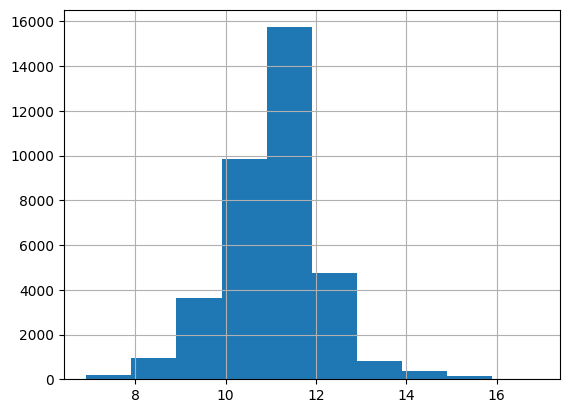

In [66]:
df_copy['ConvertedCompYearly'].hist()

`ConvertedCompYearly` is now normally distrbuted.

# Model Building

In [67]:
#Changing datatype of columns
float_cols=['YearsCode', 'ConvertedCompYearly']
for i in df_copy.columns:
    if i not in float_cols:
        df_copy[i]=df_copy[i].astype('category')

In [68]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36509 entries, 0 to 36508
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Employment                      36509 non-null  category
 1   Country                         36509 non-null  category
 2   EdLevel                         36509 non-null  category
 3   YearsCode                       36509 non-null  float64 
 4   DevType                         36509 non-null  category
 5   OrgSize                         36509 non-null  category
 6   Age                             36509 non-null  category
 7   Gender                          36509 non-null  category
 8   C                               36509 non-null  category
 9   C++                             36509 non-null  category
 10  C#                              36509 non-null  category
 11  Dart                            36509 non-null  category
 12  Go                

Building a neural network architecture to predict yearly compensations 

In [69]:
A=df_copy.iloc[:, :-1].values
b=df_copy.iloc[:, -1].values
A

array([[ 2., 11.,  2., ...,  1.,  0.,  0.],
       [ 1.,  5.,  0., ...,  0.,  0.,  0.],
       [ 0., 11.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0., 12.,  4., ...,  0.,  1.,  0.],
       [ 0.,  2.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  3., ...,  0.,  0.,  0.]])

In [70]:
def base_model():
    #Instantiating sequential class
    model=tf.keras.models.Sequential()
    #Create layers using 2 hidden layers with the rectified linear activation function and 64 units
    model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    model.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dense(units=1, activation='linear'))
    #Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model


In [71]:
estimator=tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=base_model, epochs=400, batch_size=1000)
kfold=KFold(n_splits=3)
results=cross_val_score(estimator, A, b, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())

C:\Users\JESSICA\AppData\Local\Temp\ipykernel_11336\3925612492.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator=tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=base_model, epochs=400, batch_size=1000)


Epoch 1/400
25/25 [==============================] - 8s 11ms/step - loss: 31.2378 - mean_squared_error: 29.9844
Epoch 2/400
25/25 [==============================] - 0s 10ms/step - loss: 5.7771 - mean_squared_error: 4.6374
Epoch 3/400
25/25 [==============================] - 0s 12ms/step - loss: 4.3085 - mean_squared_error: 3.2600
Epoch 4/400
25/25 [==============================] - 0s 13ms/step - loss: 3.4498 - mean_squared_error: 2.4701
Epoch 5/400
25/25 [==============================] - 0s 12ms/step - loss: 2.9209 - mean_squared_error: 1.9948
Epoch 6/400
25/25 [==============================] - 0s 11ms/step - loss: 2.5720 - mean_squared_error: 1.6899
Epoch 7/400
25/25 [==============================] - 0s 10ms/step - loss: 2.2992 - mean_squared_error: 1.4523
Epoch 8/400
25/25 [==============================] - 0s 11ms/step - loss: 2.1063 - mean_squared_error: 1.2880
Epoch 9/400
25/25 [==============================] - 0s 11ms/step - loss: 1.9733 - mean_squared_error: 1.1794
Epoch 10

## Creating input preprocessing pipeline for model

In [72]:
#Changing datatype of columns for dataframe
float_cols=['YearsCode', 'ConvertedCompYearly']
for i in salaries_data.columns:
    if i not in float_cols:
        salaries_data[i]=salaries_data[i].astype('category')

In [73]:
#Rearrange columns in salaries_data
salaries_data=salaries_data[['Employment', 'Country', 'EdLevel', 'YearsCode', 'DevType', 'OrgSize',
       'Age', 'Gender', 'C', 'C++', 'C#', 'Dart', 'Go',
       'Bash/Shell', 'HTML/CSS', 'Java', 'JavaScript', 'Node.js', 'TypeScript',
       'Python', 'Kotlin', 'R', 'SQL', 'Microsoft SQL Server', 'MySQL',
       'PostgreSQL', 'Redis', 'MongoDB', 'SQLite', 'MariaDB', 'Firebase',
       'Oracle', 'DynamoDB', 'I dont use databases', 'AWS', 'GCP',
       'Microsoft Azure', 'Other Cloud Platforms',
       'I dont use any cloud platforms', 'React.js', 'Spring', 'Angular',
       'ASP.NET or ASP.NET Core', 'Django', 'Flask', 'jQuery',
       'I dont use any webframeworks', 'Other webframeworks', 'NumPy',
       'Pandas', 'Keras/Tensorflow', 'Apache Spark', 'Hadoop',
       '.NET Framework', '.NET Core/.NET 5', 'Flutter', 'React Native',
       'Torch/PyTorch', 'No other frameworks used', 'Git', 'Docker',
       'Kubernetes', 'Terraform', 'No extra tools used', 'ConvertedCompYearly']]

In [74]:
#Transform 'ConvertedCompYearly' using log transform and filling null values with those generated in df_copy
salaries_data['ConvertedCompYearly']=np.log(salaries_data['ConvertedCompYearly'])
salaries_data=salaries_data.fillna(df_copy)
salaries_data['ConvertedCompYearly'].max()

16.898440649460035

In [75]:
#Getting features and dependent variables 
X=salaries_data.iloc[:, :-1]
y=salaries_data.iloc[:, -1]


In [76]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [77]:
#Creating pipeline
categorical_features = ["Employment", "Country", "EdLevel", 'DevType', 'OrgSize', 'Age', 'Gender']
categorical_transformer = OrdinalEncoder()

preprocessing = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ('scale_data', MinMaxScaler(), ['YearsCode'])
    ], remainder='passthrough'
)

In [78]:
#Fit and transform column transformer on X_train
X_train=preprocessing.fit_transform(X_train)
X_train.shape

(24461, 64)

In [79]:
#Change datatype of X_train
X_train=X_train.astype(float)

In [80]:
joblib.dump(preprocessing, 'preprocessing.joblib')

['preprocessing.joblib']

In [81]:
#Build model
model=tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=base_model, epochs=400, batch_size=1000)
model.fit(X_train, y_train)

C:\Users\JESSICA\AppData\Local\Temp\ipykernel_11336\3811933082.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=base_model, epochs=400, batch_size=1000)


Epoch 1/400
25/25 [==============================] - 3s 9ms/step - loss: 72.6197 - mean_squared_error: 71.3991
Epoch 2/400
25/25 [==============================] - 0s 11ms/step - loss: 8.4253 - mean_squared_error: 7.2840
Epoch 3/400
25/25 [==============================] - 0s 9ms/step - loss: 5.3739 - mean_squared_error: 4.2974
Epoch 4/400
25/25 [==============================] - 0s 9ms/step - loss: 4.1571 - mean_squared_error: 3.1237
Epoch 5/400
25/25 [==============================] - 0s 8ms/step - loss: 3.2954 - mean_squared_error: 2.2928
Epoch 6/400
25/25 [==============================] - 0s 10ms/step - loss: 2.8305 - mean_squared_error: 1.8530
Epoch 7/400
25/25 [==============================] - 0s 10ms/step - loss: 2.5657 - mean_squared_error: 1.6126
Epoch 8/400
25/25 [==============================] - 0s 10ms/step - loss: 2.3772 - mean_squared_error: 1.4450
Epoch 9/400
25/25 [==============================] - 0s 12ms/step - loss: 2.2405 - mean_squared_error: 1.3266
Epoch 10/400

In [82]:
#Save model
model.model.save('model.h5')

In [83]:
X_test.shape

(12048, 64)

In [85]:
#Making predictions on Xtest
preprocess=joblib.load('preprocessing.joblib')
processed_data=preprocess.transform(X_test)
processed_data=processed_data.astype(float)
processed_data
        

array([[ 0.,  4.,  3., ...,  0.,  0.,  0.],
       [ 0., 12.,  0., ...,  0.,  0.,  0.],
       [ 0., 12.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  6.,  0., ...,  0.,  0.,  1.],
       [ 0.,  5.,  2., ...,  0.,  0.,  0.],
       [ 0.,  4.,  5., ...,  0.,  0.,  0.]])

In [88]:
#Load model
model_new=tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=base_model, epochs=400, batch_size=1000, verbose=1)
model_new.model=tf.keras.models.load_model('model.h5')
y_preds=model_new.model.predict(processed_data, verbose=0)
y_preds

C:\Users\JESSICA\AppData\Local\Temp\ipykernel_11336\170034942.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_new=tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=base_model, epochs=400, batch_size=1000, verbose=1)


array([[11.15522  ],
       [11.976954 ],
       [12.037094 ],
       ...,
       [10.388566 ],
       [10.2262945],
       [11.286884 ]], dtype=float32)

In [90]:
#Calculating mean squared error on predictions
print (f'The mean squared error is {mean_squared_error(y_test, y_preds)}')


The mean squared error is 0.6551722356977631
